In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [3]:
train_data = pd.read_csv(r'Y:\Python\МЛ задачи\Разработчик ML\\train.tsv',sep='\t')
test_data = pd.read_csv(r'Y:\Python\МЛ задачи\Разработчик ML\\test.tsv',sep='\t')
val_data = pd.read_csv(r'Y:\Python\МЛ задачи\Разработчик ML\\val.tsv',sep='\t')

In [4]:
#Создаем список всех уникальных библиотек
lib_list = []
for libs in range(len(train_data)):
    
    for lib in train_data['libs'].iloc[libs].split(sep = ','):
        lib_list.append(lib)
lib_list = np.unique(lib_list)

In [5]:
libs_map = dict(zip(lib_list, [i for i in range(len(lib_list))]))

In [6]:
#Расширяем датафрейм на число уникальных библиотек len(lib_list)
for library in tqdm(libs_map):
    val_data[f'{library}'] = 0

100%|████████████████████████████████████████████████████████████████████████████| 1924/1924 [00:01<00:00, 1872.96it/s]


In [7]:
#Если библиотека присутствует в списке, присваиваем ей значение 1
for i in tqdm(range(len(val_data))):
    for col in val_data.columns:
        if col in val_data.iloc[i, 2].split(sep=','):
            val_data[f'{col}'].iloc[i] = 1

  0%|                                                                                         | 0/1200 [00:00<?, ?it/s]c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:44<00:00, 27.12it/s]


In [8]:
#То же самое проделываем для тестовой и валидационной выборки
for library in tqdm(libs_map):
    test_data[f'{library}'] = 0

100%|████████████████████████████████████████████████████████████████████████████| 1924/1924 [00:00<00:00, 2313.13it/s]


In [9]:
for i in tqdm(range(len(test_data))):
    for col in test_data.columns:
        if col in test_data.iloc[i, 0].split(sep=','):
            test_data[f'{col}'].iloc[i] = 1

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:45<00:00, 26.33it/s]


In [10]:
for library in tqdm(libs_map):
    train_data[f'{library}'] = 0
    

100%|█████████████████████████████████████████████████████████████████████████████| 1924/1924 [00:03<00:00, 637.95it/s]


In [11]:
for i in tqdm(range(len(train_data))):
    for col in train_data.columns:
        if col in train_data.iloc[i, 2].split(sep=','):
            train_data[f'{col}'].iloc[i] = 1

    
    

100%|████████████████████████████████████████████████████████████████████████████| 16290/16290 [10:08<00:00, 26.79it/s]


In [12]:
to_drop_cols = ['is_virus', 'filename', 'libs']

In [13]:
train_X = train_data.drop(to_drop_cols, axis = 1)
train_Y = train_data['is_virus']

In [14]:
val_X = val_data.drop(to_drop_cols, axis = 1)
val_Y = val_data['is_virus']

In [15]:
test_X = test_data.drop(['libs'], axis = 1)

In [16]:
dtrain = xgb.DMatrix(train_X, train_Y)

In [17]:
dval = xgb.DMatrix(val_X, val_Y)

In [18]:
dtest = xgb.DMatrix(test_X)

In [19]:
param = {"max_depth": 2, "eta": 1, "objective": "binary:logistic"}

In [20]:
watchlist = [(dval, "eval"), (dtrain, "train")]

In [21]:
num_round = 1000
virus_model = xgb.train(param, dtrain, num_boost_round=num_round, evals=watchlist)

[02:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-logloss:0.54774	train-logloss:0.55062
[1]	eval-logloss:0.47432	train-logloss:0.49009
[2]	eval-logloss:0.45106	train-logloss:0.45827
[3]	eval-logloss:0.42886	train-logloss:0.43667
[4]	eval-logloss:0.41634	train-logloss:0.42336
[5]	eval-logloss:0.40649	train-logloss:0.41354
[6]	eval-logloss:0.39936	train-logloss:0.40692
[7]	eval-logloss:0.38846	train-logloss:0.40043
[8]	eval-logloss:0.38130	train-logloss:0.39306
[9]	eval-logloss:0.38234	train-logloss:0.38787
[10]	eval-logloss:0.37712	train-logloss:0.38253
[11]	eval-logloss:0.37100	train-logloss:0.37866
[12]	eval-logloss:0.36278	train-logloss:0.37370
[13]	eval-logloss:0.35917	train-logloss:0.37046
[14]	eval-logloss:0.35590	tr

[164]	eval-logloss:0.30185	train-logloss:0.28502
[165]	eval-logloss:0.30211	train-logloss:0.28498
[166]	eval-logloss:0.30150	train-logloss:0.28481
[167]	eval-logloss:0.30156	train-logloss:0.28463
[168]	eval-logloss:0.30140	train-logloss:0.28458
[169]	eval-logloss:0.30128	train-logloss:0.28453
[170]	eval-logloss:0.30111	train-logloss:0.28414
[171]	eval-logloss:0.30101	train-logloss:0.28401
[172]	eval-logloss:0.30073	train-logloss:0.28397
[173]	eval-logloss:0.30074	train-logloss:0.28390
[174]	eval-logloss:0.30088	train-logloss:0.28376
[175]	eval-logloss:0.30032	train-logloss:0.28367
[176]	eval-logloss:0.30043	train-logloss:0.28363
[177]	eval-logloss:0.30046	train-logloss:0.28359
[178]	eval-logloss:0.30062	train-logloss:0.28353
[179]	eval-logloss:0.30086	train-logloss:0.28351
[180]	eval-logloss:0.30094	train-logloss:0.28332
[181]	eval-logloss:0.30094	train-logloss:0.28325
[182]	eval-logloss:0.30002	train-logloss:0.28304
[183]	eval-logloss:0.29978	train-logloss:0.28296
[184]	eval-logloss:0

[332]	eval-logloss:0.29442	train-logloss:0.26635
[333]	eval-logloss:0.29447	train-logloss:0.26635
[334]	eval-logloss:0.29453	train-logloss:0.26633
[335]	eval-logloss:0.29450	train-logloss:0.26632
[336]	eval-logloss:0.29459	train-logloss:0.26631
[337]	eval-logloss:0.29457	train-logloss:0.26627
[338]	eval-logloss:0.29452	train-logloss:0.26626
[339]	eval-logloss:0.29457	train-logloss:0.26625
[340]	eval-logloss:0.29469	train-logloss:0.26621
[341]	eval-logloss:0.29461	train-logloss:0.26621
[342]	eval-logloss:0.29465	train-logloss:0.26620
[343]	eval-logloss:0.29441	train-logloss:0.26617
[344]	eval-logloss:0.29439	train-logloss:0.26608
[345]	eval-logloss:0.29433	train-logloss:0.26607
[346]	eval-logloss:0.29433	train-logloss:0.26606
[347]	eval-logloss:0.29428	train-logloss:0.26599
[348]	eval-logloss:0.29440	train-logloss:0.26587
[349]	eval-logloss:0.29441	train-logloss:0.26577
[350]	eval-logloss:0.29407	train-logloss:0.26568
[351]	eval-logloss:0.29419	train-logloss:0.26559
[352]	eval-logloss:0

[500]	eval-logloss:0.29770	train-logloss:0.25810
[501]	eval-logloss:0.29770	train-logloss:0.25809
[502]	eval-logloss:0.29769	train-logloss:0.25803
[503]	eval-logloss:0.29802	train-logloss:0.25794
[504]	eval-logloss:0.29734	train-logloss:0.25784
[505]	eval-logloss:0.29724	train-logloss:0.25779
[506]	eval-logloss:0.29693	train-logloss:0.25770
[507]	eval-logloss:0.29719	train-logloss:0.25763
[508]	eval-logloss:0.29723	train-logloss:0.25761
[509]	eval-logloss:0.29722	train-logloss:0.25756
[510]	eval-logloss:0.29721	train-logloss:0.25751
[511]	eval-logloss:0.29727	train-logloss:0.25745
[512]	eval-logloss:0.29718	train-logloss:0.25738
[513]	eval-logloss:0.29763	train-logloss:0.25734
[514]	eval-logloss:0.29804	train-logloss:0.25727
[515]	eval-logloss:0.29769	train-logloss:0.25723
[516]	eval-logloss:0.29740	train-logloss:0.25719
[517]	eval-logloss:0.29740	train-logloss:0.25718
[518]	eval-logloss:0.29740	train-logloss:0.25716
[519]	eval-logloss:0.29768	train-logloss:0.25711
[520]	eval-logloss:0

[668]	eval-logloss:0.29780	train-logloss:0.25316
[669]	eval-logloss:0.29780	train-logloss:0.25316
[670]	eval-logloss:0.29788	train-logloss:0.25315
[671]	eval-logloss:0.29782	train-logloss:0.25314
[672]	eval-logloss:0.29793	train-logloss:0.25313
[673]	eval-logloss:0.29786	train-logloss:0.25311
[674]	eval-logloss:0.29779	train-logloss:0.25310
[675]	eval-logloss:0.29781	train-logloss:0.25308
[676]	eval-logloss:0.29794	train-logloss:0.25307
[677]	eval-logloss:0.29785	train-logloss:0.25306
[678]	eval-logloss:0.29792	train-logloss:0.25305
[679]	eval-logloss:0.29788	train-logloss:0.25304
[680]	eval-logloss:0.29781	train-logloss:0.25303
[681]	eval-logloss:0.29789	train-logloss:0.25302
[682]	eval-logloss:0.29769	train-logloss:0.25300
[683]	eval-logloss:0.29770	train-logloss:0.25298
[684]	eval-logloss:0.29788	train-logloss:0.25293
[685]	eval-logloss:0.29790	train-logloss:0.25289
[686]	eval-logloss:0.29768	train-logloss:0.25284
[687]	eval-logloss:0.29786	train-logloss:0.25278
[688]	eval-logloss:0

[836]	eval-logloss:0.29732	train-logloss:0.24970
[837]	eval-logloss:0.29727	train-logloss:0.24969
[838]	eval-logloss:0.29722	train-logloss:0.24968
[839]	eval-logloss:0.29722	train-logloss:0.24967
[840]	eval-logloss:0.29728	train-logloss:0.24965
[841]	eval-logloss:0.29747	train-logloss:0.24964
[842]	eval-logloss:0.29739	train-logloss:0.24964
[843]	eval-logloss:0.29741	train-logloss:0.24963
[844]	eval-logloss:0.29747	train-logloss:0.24961
[845]	eval-logloss:0.29744	train-logloss:0.24961
[846]	eval-logloss:0.29751	train-logloss:0.24960
[847]	eval-logloss:0.29739	train-logloss:0.24960
[848]	eval-logloss:0.29741	train-logloss:0.24960
[849]	eval-logloss:0.29748	train-logloss:0.24959
[850]	eval-logloss:0.29745	train-logloss:0.24958
[851]	eval-logloss:0.29738	train-logloss:0.24957
[852]	eval-logloss:0.29746	train-logloss:0.24957
[853]	eval-logloss:0.29752	train-logloss:0.24956
[854]	eval-logloss:0.29748	train-logloss:0.24955
[855]	eval-logloss:0.29776	train-logloss:0.24953
[856]	eval-logloss:0

In [22]:
virus_model.best_iteration

999

In [38]:
virus_model.save_model("virus_model.json")

In [24]:
preds = virus_model.predict(dval)
labels = dval.get_label()
print(
    "error=%f"
    % (
        sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i])
        / float(len(preds))
    )
)

error=0.115000


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [26]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))


In [27]:
predictions = []
for i in range(len(preds)):
    if preds[i] > 0.5:
        predictions.append(1.)
    else:
        predictions.append(0.)
predictions = np.array(predictions)

In [28]:
cm = confusion_matrix(labels, predictions)

In [29]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(283, 117, 21, 779)

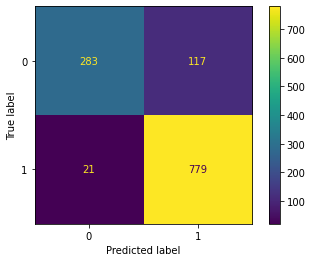

In [30]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [31]:
report = classification_report(labels, predictions, output_dict=True)
report = pd.DataFrame(report).transpose()

In [32]:
report

,precision,recall,f1-score,support
0.0,0.930921,0.707500,0.803977,400.000
1.0,0.869420,0.973750,0.918632,800.000
accuracy,0.885000,0.885000,0.885000,0.885
macro avg,0.900170,0.840625,0.861305,1200.000
weighted avg,0.889920,0.885000,0.880414,1200.000


In [33]:
#Модель показывает recall по 1 классу 97%, это значит что она находит почти все вредоносные файлы

In [34]:
val_file = open("validation.txt", "w+")
val_file.write("True positive: {}".format(tp))
val_file.write("\nFalse positive: {}".format(fp))
val_file.write("\nTrue negative: {}".format(tn))
val_file.write("\nFalse negative: {}".format(fn))
val_file.write("\nAccuracy: {}".format(report.iloc[2,0]))
val_file.write("\nLabel 0:")
val_file.write("\nPrecision: {}".format(report['precision'].values[0]))
val_file.write("\nRecall: {}".format(report['recall'].values[0]))
val_file.write("\nF1: {}".format(report['f1-score'].values[0]))
val_file.write("\nLabel 1:")
val_file.write("\nPrecision: {}".format(report['precision'].values[1]))
val_file.write("\nRecall: {}".format(report['recall'].values[1]))
val_file.write("\nF1: {}".format(report['f1-score'].values[1]))
val_file.close()

In [35]:
test_pred = virus_model.predict(dtest)

In [36]:
test_predictions = []
for i in range(len(test_pred)):
    if test_pred[i] > 0.5:
        test_predictions.append(1.)
    else:
        test_predictions.append(0.)
test_predictions = np.array(test_predictions)

In [37]:
test_file = open("prediction.txt", "w+")
test_file.write("prediction")
for i in range(len(test_predictions)):
    test_file.write("\n{}".format(int(test_predictions[i])))
test_file.close()